# Задание 3. Python
## 3.1 Задача

1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
import scipy 
from scipy import stats
from scipy.stats import levene
from scipy.stats import norm
from tqdm.auto import tqdm

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize': (10, 5)})

## Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

In [3]:
def load_groups_add(link):
    # чтение таблиц из файлов
    # groups = pd.read_csv('Files/Проект_2_groups.csv', sep=';')
    # groups_add = pd.read_csv(path, sep='[;,]', engine='python')
    # active_studs = pd.read_csv('Files/Проект_2_active_studs.csv', sep=';')
    # checks = pd.read_csv('Files/Проект_2_checks.csv', sep=';')
    
    # чтение таблиц по ссылкам  
    req1 = requests.get('https://s856sas.storage.yandex.net/rdisk/bf63a619bc7bbb74fe97b32a6309d58f06750e8291c5b4b40a8563ede208638b/63166c75/fKqInKw3d7bLFOeFnMGnhLWIS9AmXMMXWGR17A-BkO3-qg5Wp8tUAp7lxoJJvJyG8pjltSuuxShICmGl2FDiJhbsM4PC04KdB-NoZUjfeOOr8npumZHI4midPdWhecNq?uid=0&filename=%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_groups.csv&disposition=attachment&hash=FjLs%2B6AJdyaRoyFMFeL4raj9RoBP3hYIuXfguWvuEGcjdjYEIrmN7ZN/eZ32Z77Cq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=724984&hid=4b9098e1d545e562c779de19f9f64e2f&media_type=spreadsheet&tknv=v2&rtoken=Cd2umVfCJ7PZ&force_default=no&ycrid=na-1ece694e3e6ea729ff90f9f91d76f5ed-downloader13h&ts=5e7f4e86c4740&s=abd4364b0d1896ee4f3e52f7e984787320fe779bd0b1b6049b1c7d354190cb18&pb=U2FsdGVkX18CUuITc0zHpFLFgnhNoLaBcxXkGD0cHhPmclo2GfCMEA4IQtO3qQxp-HljLNqfLs5jYZtD-Lu6yl3hNihJPgPbvi_5XOOiU3PNpGVlq4S2zOI7oRZpwk9W')
    data1 = req1.content
    groups = pd.read_csv(BytesIO(data1), sep=';')

    req2 = requests.get('https://s750sas.storage.yandex.net/rdisk/58e21ecf036fb428c99a58b3eea3dfc9d828030aec5f58d18ecb15aa8629c75a/63166c79/fKqInKw3d7bLFOeFnMGnhGAdJ2MSdW82i4_ghmwgsZlWhJkpRytn07Ls4kX484X-lezQy4loqSz9AFrIeHDnv8QEHwKSTiYbb_hzq1q6XQir8npumZHI4midPdWhecNq?uid=0&filename=%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_group_add.csv&disposition=attachment&hash=0ertv33lnyTdzTu9NbdN9MtgpuTSXleSHZ%2BvhK85v05jGwJs7DHSrj4ununKsRcfq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=949&hid=e8dcec35987c367a56f82404a22463b7&media_type=spreadsheet&tknv=v2&rtoken=Hnet4EXoEDIB&force_default=no&ycrid=na-d8ac261293290371282d40e6940e844e-downloader13h&ts=5e7f4e8a95040&s=12cba5d16f4329502e629bd330d04e72fbd5fb0b05ac0c4c6b48ab41823f04ce&pb=U2FsdGVkX1-pe_sK-WLOxr_dnlvToqA3t0qn2oXGXaRVl0yUHiwpfGddd1HHp1aIOtxo-j6XCU7qBxq9xNsLmSbkTR9WwC53PtrneA94Yg43VIMleGiyejCfyArvPZzp')
    data2 = req2.content
    groups_add = pd.read_csv(BytesIO(data2), sep=',')

    req3 = requests.get('https://s432vla.storage.yandex.net/rdisk/b4d324cc8665fbe98ab90b116ac3731b231173a5aefd01765cb9f70bd6e9aaf3/63166c7c/n3N0SQYM2SoDHEJIQgKt2ujEDw5jYN17sSz14UE4iwGyYlrHRmnPoV9WI8mqa1dmF6Qt_88ffG90wBmmEpDhFQ==?uid=0&filename=%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_active_studs.csv&disposition=attachment&hash=zWS0uLxK3MRXd/4/IErmDFQBGvbpGD1qm/aJx/k6EUUtE6DaDI0uGkDT4cHh/WJbq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=65131&hid=3ed23002f82477fd8c7d4a21c17d8034&media_type=spreadsheet&tknv=v2&rtoken=xxGewO8sNlOX&force_default=no&ycrid=na-a38f29ce0154caff5fd37fa2eca82b09-downloader13h&ts=5e7f4e8d71700&s=0c226b911833778c43a17d098eea7d13b89a16eeb59964039239cb48d75a2777&pb=U2FsdGVkX18xmgn6SF-y0xkm9JPvg6DmR3wQ2GaU-9eG2ZHVpLmymXm-xM47jXKzpTwW5aXgnAalidnsiVKPCJj_0gQV28TERYbMFsKwvhY')
    data3 = req3.content
    active_studs = pd.read_csv(BytesIO(data3), sep=';')

    req4 = requests.get('https://s251vla.storage.yandex.net/rdisk/992bbef236713dbaeea0587caad4684548e3cc51345236dee649e0ad1968fcd8/63166c80/n3N0SQYM2SoDHEJIQgKt2psRrG10OKyAasqgpda4iX7NDTSjoP6nmHZtzOqJXgQH436kYOx6cWVM8zgvGq_zHg==?uid=0&filename=%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_checks.csv&disposition=attachment&hash=TeGedpkC9yRvIkaaNDf1zC3bFkr2Kvo9MvW7kYjfHc5svktv83UZ47kn6%2BaauC1pq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=7764&hid=caf94adff3374e1c1a09fba3aae11e50&media_type=spreadsheet&tknv=v2&rtoken=M5pMEsicihsD&force_default=no&ycrid=na-41f169f9dbb295d16fbd44683c52d612-downloader13h&ts=5e7f4e9142000&s=7925caa1f495dd040cd42ca91a40c069c5a4c0d154bb07a0ed1ee644f6a5f7f7&pb=U2FsdGVkX1-VznT8F2Unh54EN8CnRGt88JKBloRQFR6468Q2sTHUJfXtSwmAjvxXqIWBXOTw2Zsxf0AYkr0PLZsJKm-9Em2UpQGiDk58tRM')
    data4 = req4.content
    checks = pd.read_csv(BytesIO(data4), sep=';')
    
    # переименование столбцов у groups_add
    if groups_add.iloc[1][1] == 'A' or groups_add.iloc[1][1] == 'B':
        groups_add.columns = ['id', 'grp']
    else:
        groups_add.columns = ['grp', 'id']
    
    # объединим таблицы groups и groups_add для получения полной картины о пользователях, попавших в a/b тестирование
    groups = pd.concat([groups, groups_add])
    
    # переименуем колонку student_id в id для объединения таблиц
    active_studs = active_studs.rename(columns={'student_id': 'id'})
    checks = checks.rename(columns={'student_id': 'id'})    
    
    # узнаем к каким группам принадлежали пользователи, зашедшие в дни эксперимента
    final_table = active_studs.merge(groups, how='left', on='id')

    # объединим полученные данные с третьей таблицей и пустые значения по выручке заменим на 0 
    # для удобства дальнейших рассчетов
    final_table = final_table.merge(checks, how='left', on='id').fillna(0)
    
    # узнаем к каким группам принадлежали пользователи, купившие в дни эксперимента
    final_checks = checks.merge(groups, how='left', on='id')
    final_checks
    
    # объединим пользователей, купивших в дни эксперимента и основную таблицу, для того, чтобы учесть пользователей, 
    # которые совершили покупку, но не заходили на платформу
    final_table = pd.concat([final_table, final_checks])
    final_table
    
    # удалим повторяющиеся id из результирующей таблицы
    final_table = final_table.drop_duplicates(subset=['id'])
    final_table

    # проверим кол-во пользователей в каждой из групп, сумму по выручке и arpu
    final_table_grouped = final_table
    final_table_grouped['rev2'] = final_table_grouped.rev
    final_table_grouped['rev3'] = final_table_grouped.rev

    final_table_grouped = final_table_grouped\
        .groupby(['grp'], as_index=False)\
        .agg({'id': 'count', 'rev': 'sum', 'rev2': 'mean'})\
        .rename(columns={'id': 'number_of_users', 'rev': 'revenue', 'rev2': 'arpu'})

    # проверим кол-во платящих пользователей в каждой из групп и arppu
    final_table_grouped_active = final_table\
        .query('rev != 0')\
        .groupby(['grp'], as_index=False)\
        .agg({'id': 'count', 'rev2': 'mean', 'rev3': 'median'})\
        .rename(columns={'id': 'number_of_paid_users', 'rev': 'revenue', 'rev2': 'arppu', 'rev3': 'rev_median'})

    # объединим таблицы для наглядности сравнения метрик
    final_table_metrics = final_table_grouped.merge(final_table_grouped_active, how='left', on='grp')
    # посчитаем конверсию из пользователей в пользователей, осуществивших покупку
    final_table_metrics['CR'] = final_table_metrics.number_of_paid_users / final_table_metrics.number_of_users * 100
    
    return final_table_metrics, final_table

In [4]:
final_table_metrics, final_table = load_groups_add('https://s750sas.storage.yandex.net/rdisk/49e6189ed5f1bfc38d1a124acd92831922790605e4da7738a38b3f7d566f9bd2/62fd7236/fKqInKw3d7bLFOeFnMGnhGAdJ2MSdW82i4_ghmwgsZlWhJkpRytn07Ls4kX484X-lezQy4loqSz9AFrIeHDnv8QEHwKSTiYbb_hzq1q6XQir8npumZHI4midPdWhecNq?uid=0&filename=%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_group_add.csv&disposition=attachment&hash=0ertv33lnyTdzTu9NbdN9MtgpuTSXleSHZ%2BvhK85v05jGwJs7DHSrj4ununKsRcfq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=949&hid=e8dcec35987c367a56f82404a22463b7&media_type=spreadsheet&tknv=v2&rtoken=WYeDp6gHqZKy&force_default=no&ycrid=na-d7b6ea6a157df7fe7b29c8792aae21ed-downloader5f&ts=5e677c7f87980&s=b42b4d42a81c72d5c4d93c875a3d6a58100dbf1cab8028001901ee1407b264dc&pb=U2FsdGVkX19VRCbHkIvqdCSN22ITS6MpuWtHMpF0mBzyrqbSXDwniKzz-coBgJREUHG8XhthvhdPMaJc9Yao6xIq62NueYwgVnSSiKWfhFge_7h7TQfmKW-9Jho5yK27')
final_table_metrics

,grp,number_of_users,revenue,arpu,number_of_paid_users,arppu,rev_median,CR
0,A,1567,92096.0000,58.772176,107,860.710280,690.0,6.828334
1,B,6923,481230.0036,69.511773,434,1108.824893,935.0,6.268959


## Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [5]:
def graphics_print(final_table, final_table_metrics):
    # передадим выборки в переменные 
    # a и b включают в себя всех пользователей, их будем использовать для сравнения ARPU 
    # a0 и b0 включают в себя только заплативших пользователей, будем использовать их для сравнения ARPPU
    
    a = final_table\
        .query("grp == 'A'")\
        .rev

    b = final_table\
        .query("grp == 'B'")\
        .rev

    a0 = final_table\
        .query("grp == 'A' & rev != 0")\
        .rev

    b0 = final_table\
        .query("grp == 'B' & rev != 0")\
        .rev
    
    print('A и B включают в себя всех пользователей, их будем использовать для сравнения ARPU ')
    print('A0 и B0 включают в себя только заплативших пользователей, будем использовать их для сравнения ARPPU')
    
    fig = plt.figure()

    ax_1 = fig.add_subplot(3, 2, 1)
    ax_2 = fig.add_subplot(3, 2, 2)
    ax_3 = fig.add_subplot(3, 2, 3)
    ax_4 = fig.add_subplot(3, 2, 4)
    ax_5 = fig.add_subplot(3, 2, 5)
    ax_6 = fig.add_subplot(3, 2, 6)
    
    fig.set_figheight(15)
    fig.set_figwidth(15)

    ax_1.set(title='гистограмма выборки А')
    ax_2.set(title='гистограмма выборки В')
    ax_3.set(title='гистограмма выборки А0')
    ax_4.set(title='гистограмма выборки B0')
    ax_5.set(title='боксплоты выборок А и B')
    ax_6.set(title='боксплоты выборок А0 и B0')
    
    sns.distplot(a, kde=False, ax=ax_1)
    sns.distplot(b, kde=False, ax=ax_2)
    sns.distplot(a0, kde=False, ax=ax_3)
    sns.distplot(b0, kde=False, ax=ax_4)
    sns.boxplot(x="grp", y="rev", data=final_table, ax=ax_5)
    sns.boxplot(x="grp", y="rev", data=final_table.query('rev != 0'), ax=ax_6)
    plt.subplots_adjust(wspace=0.4, hspace=0.7)
    plt.show()

A и B включают в себя всех пользователей, их будем использовать для сравнения ARPU 
A0 и B0 включают в себя только заплативших пользователей, будем использовать их для сравнения ARPPU


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


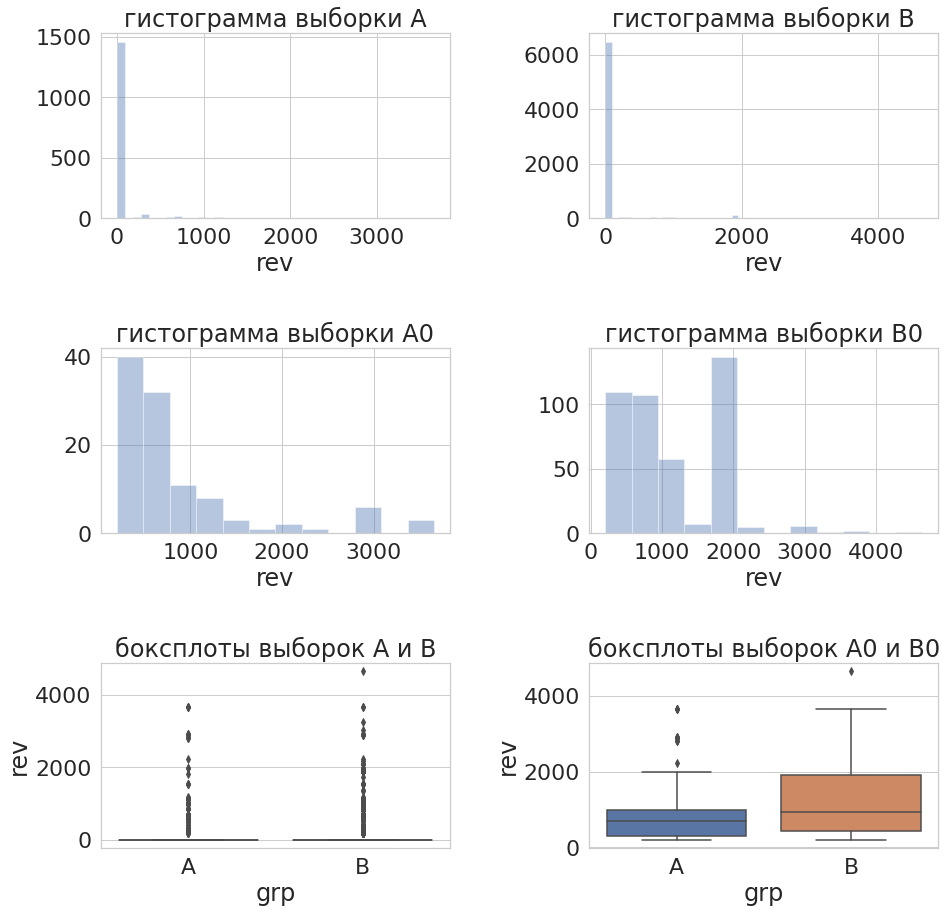

In [6]:
graphics_print(final_table, final_table_metrics)

In [7]:
# напишем функции для сравнения с помощью бутстрапа
plt.style.use('ggplot')


# бутстрап с оценкой среднего
def get_bootstrap_mean(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=1000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace=True  # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1) - statistic(samples_2))  # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}


# бутстрап с оценкой медианного
def get_bootstrap_median(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=1000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace=True  # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1) - statistic(samples_2))  # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

## Дополнительно реализуем функцию, которая будет давать информацию о выборках и их статистических различиях

In [8]:
def statics_info(final_table, final_table_metrics):
    a = final_table\
        .query("grp == 'A'")\
        .rev

    b = final_table\
        .query("grp == 'B'")\
        .rev

    a0 = final_table\
        .query("grp == 'A' & rev != 0")\
        .rev

    b0 = final_table\
        .query("grp == 'B' & rev != 0")\
        .rev
    
    if stats.shapiro(a).pvalue < 0.05:
        print(f"p-значение в тесте Шапиро выборки А={stats.shapiro(a).pvalue}," + 
              "отклоняем нулевую гипотезу, выборка не распределена нормально")
    else: 
        print(f"p-значение дв тесте Шапиро выборки А={stats.shapiro(a).pvalue}," + 
              "принимаем нулевую гипотезу, выборка распределена нормально")             

    if stats.shapiro(b).pvalue < 0.05:
        print(f"p-значение в тесте Шапиро выборки B={stats.shapiro(b).pvalue}," + 
              "отклоняем нулевую гипотезу, выборка не распределена нормально")
    else: 
        print(f"p-значение в тесте Шапиро выборки B={stats.shapiro(b).pvalue}," + 
              "принимаем нулевую гипотезу, выборка распределена нормально")             

    if stats.shapiro(a0).pvalue < 0.05:
        print(f"p-значение в тесте Шапиро выборки А0={stats.shapiro(a0).pvalue}," + 
              "отклоняем нулевую гипотезу, выборка не распределена нормально")
    else: 
        print(f"p-значение в тесте Шапиро выборки А0={stats.shapiro(a0).pvalue}," + 
              "принимаем нулевую гипотезу, выборка распределена нормально")             

    if stats.shapiro(b0).pvalue < 0.05:
        print(f"p-значение в тесте Шапиро выборки B0={stats.shapiro(b0).pvalue}," + 
              "отклоняем нулевую гипотезу, выборка не распределена нормально", "\n")
    else: 
        print(f"p-значение в тесте Шапиро выборки B0={stats.shapiro(b0).pvalue}," + 
              "принимаем нулевую гипотезу, выборка распределена нормально", "\n")  
        
    # посчитаем дисперсии
    sd_a = round(np.std(a), 2)
    sd_b = round(np.std(b), 2)
    print(f"Дисперсия выборки А={sd_a}")
    print(f"Дисперсия выборки B={sd_b}")
    sd_a0 = round(np.std(a0), 2)
    sd_b0 = round(np.std(b0), 2)
    print(f"Дисперсия выборки А0={sd_a0}")
    print(f"Дисперсия выборки B0={sd_b0}", "\n") 
        
    # проверяем равность дисперсий, нулевая гипотеза для теста Левена состоит в том, что дисперсия между группами одинакова
    stat, p = levene(a, b)
    if p < 0.05:
        print(f"p-значение для выборок A и B в тесте Левена={p}," + 
              "отклоняем нулевую гипотезу, дисперсия между A и B не одинакова")
    else: 
        print(f"p-значение для выборок A и B в тесте Левена={p}," + 
              "принимаем нулевую гипотезу, дисперсия между A и B одинакова")    

    stat, p = levene(a0, b0)
    if p < 0.05:
        print(f"p-значение для выборок A0 и B0 в тесте Левена={p}," + 
              "отклоняем нулевую гипотезу, дисперсия между A0 и B0 не одинакова", "\n")
    else: 
        print(f"p-значение для выборок A0 и B0 в тесте Левена={p}," + 
              "принимаем нулевую гипотезу, дисперсия между A0 и B0 одинакова", "\n")      
        
    # посчитаем p-value с помощью t-теста
    if scipy.stats.ttest_ind(a, b).pvalue < 0.05:
        print(f"p-значение для t-test средних A и B={scipy.stats.ttest_ind(a,b).pvalue}," + 
              "отклоняем нулевую гипотезу, различия между средними статистически значимы (ARPU)")
    else: 
        print(f"p-значение для t-test средних A и B={scipy.stats.ttest_ind(a,b).pvalue}," + 
              "принимаем нулевую гипотезу, различия между средними статистически незначимы (ARPU)")

    if scipy.stats.ttest_ind(a0, b0).pvalue < 0.05:
        print(f"p-значение для t-test средних A0 и B0={scipy.stats.ttest_ind(a0,b0).pvalue}," + 
              "отклоняем нулевую гипотезу, различия между средними статистически значимы (ARPPU)", "\n")
    else: 
        print(f"p-значение для t-test средних A0 и B0={scipy.stats.ttest_ind(a0,b0).pvalue}," + 
              "принимаем нулевую гипотезу, различия между средними статистически незначимы (ARPPU)", "\n")
        
    # посчитаем p-value с помощью u-теста
    if scipy.stats.mannwhitneyu(a, b).pvalue < 0.05:
        print(f"p-значение для u-test средних A и B={scipy.stats.mannwhitneyu(a,b).pvalue}," + 
              "отклоняем нулевую гипотезу, различия между средними статистически значимы (ARPU)")
    else: 
        print(f"p-значение для u-test средних A и B={scipy.stats.mannwhitneyu(a,b).pvalue}," + 
              "принимаем нулевую гипотезу, различия между средними статистически незначимы (ARPU)")

    if scipy.stats.mannwhitneyu(a0, b0).pvalue < 0.05:
        print(f"p-значение для u-test средних A0 и B0={scipy.stats.mannwhitneyu(a0,b0).pvalue}," + 
              "отклоняем нулевую гипотезу, различия между средними статистически значимы (ARPPU)", "\n")
    else: 
        print(f"p-значение для u-test средних A0 и B0={scipy.stats.mannwhitneyu(a0,b0).pvalue}," + 
              "принимаем нулевую гипотезу, различия между средними статистически незначимы (ARPPU)", "\n")
        
    x = get_bootstrap_mean(a, b)["p_value"]    
    if x < 0.05:
        print(f"p-значение для bootstrap-test средних A и B={x}," + 
              "отклоняем нулевую гипотезу, различия между средними статистически значимы (ARPU)")
    else: 
        print(f"p-значение для bootstrap-test средних A и B={x}," + 
              "принимаем нулевую гипотезу, различия между средними статистически незначимы (ARPU)")
 
    x = get_bootstrap_mean(a0, b0)["p_value"] 
    if x < 0.05:
        print(f"p-значение для bootstrap-test средних A0 и B0={x}," + 
              "отклоняем нулевую гипотезу, различия между средними статистически значимы (ARPPU)", "\n")
    else: 
        print(f"p-значение для bootstrap-test средних A0 и B0={x}," + 
              "принимаем нулевую гипотезу, различия между средними статистически незначимы (ARPPU)", "\n")    
        
    # создадим колонку конверсия со значением 1 или 0 для каждого пользователя в зависимости от того, была ли у него конверсия
    final_table['conver'] = np.where(final_table.rev > 0, 1, 0)
    final_table    
    
    # создадим выборки для групп по столбцу конверсия
    a_conv = final_table\
        .query("grp == 'A'")\
        .conver

    b_conv = final_table\
        .query("grp == 'B'")\
        .conver
    
    # проверим разницу между средними с помощью бутстрапа
    x = get_bootstrap_mean(a_conv, b_conv)["p_value"] 
    if x < 0.05:
        print(f"p-значение для bootstrap-test средних конверсий A и B={x}," + 
              "отклоняем нулевую гипотезу, различия между конверсий статистически значимы (CR)", "\n")
    else: 
        print(f"p-значение для bootstrap-test средних конверсий A и B={x}," + 
              "принимаем нулевую гипотезу, различия между конверсией статистически незначимы (CR)", "\n")
        
    # проверим аналогичные различия с помощью точного теста фишера, для этого посчитаем кол-во неплативших пользователей
    final_table_metrics['number_of_non_paid_users'] = final_table_metrics.number_of_users - \
                                                      final_table_metrics.number_of_paid_users
      
    # посчитаем p-значение
    data = [[final_table_metrics.number_of_paid_users[0], final_table_metrics.number_of_non_paid_users[0]],
        [final_table_metrics.number_of_paid_users[1], final_table_metrics.number_of_non_paid_users[1]]]

    # performing fishers exact test on the data
    odd_ratio, p_value = stats.fisher_exact(data)

    if p_value < 0.05:
        print(f"p-значение для теста фишера средних конверсий A и B={p_value}," + 
              "отклоняем нулевую гипотезу, различия между конверсий статистически значимы (CR)", "\n")
    else: 
        print(f"p-значение для теста фишера средних конверсий A и B={p_value}," + 
              "принимаем нулевую гипотезу, различия между конверсией статистически незначимы (CR)", "\n")

In [9]:
statics_info(final_table, final_table_metrics)

p-значение в тесте Шапиро выборки А=0.0,отклоняем нулевую гипотезу, выборка не распределена нормально
p-значение в тесте Шапиро выборки B=0.0,отклоняем нулевую гипотезу, выборка не распределена нормально
p-значение в тесте Шапиро выборки А0=5.321687643507211e-13,отклоняем нулевую гипотезу, выборка не распределена нормально
p-значение в тесте Шапиро выборки B0=8.947892893418603e-19,отклоняем нулевую гипотезу, выборка не распределена нормально 

Дисперсия выборки А=303.58
Дисперсия выборки B=326.59
Дисперсия выборки А0=812.07
Дисперсия выборки B0=740.98 

p-значение для выборок A и B в тесте Левена=0.23394283915362288,принимаем нулевую гипотезу, дисперсия между A и B одинакова
p-значение для выборок A0 и B0 в тесте Левена=0.03477352573759214,отклоняем нулевую гипотезу, дисперсия между A0 и B0 не одинакова 

p-значение для t-test средних A и B=0.2339428391527247,принимаем нулевую гипотезу, различия между средними статистически незначимы (ARPU)
p-значение для t-test средних A0 и B0=0.00250

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



p-значение для bootstrap-test средних A и B=0.33768288818606695,принимаем нулевую гипотезу, различия между средними статистически незначимы (ARPU)



p-значение для bootstrap-test средних A0 и B0=0.02133405362151117,отклоняем нулевую гипотезу, различия между средними статистически значимы (ARPPU) 




p-значение для bootstrap-test средних конверсий A и B=0.535207939727685,принимаем нулевую гипотезу, различия между конверсией статистически незначимы (CR) 

p-значение для теста фишера средних конверсий A и B=0.42262740586374836,принимаем нулевую гипотезу, различия между конверсией статистически незначимы (CR) 

